In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
# import pyflux as pf

import arch
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller


from data.stock_data import StockData
# from data.macro_data 


In [26]:
# Define the stock data you want to fetch, and fetch it
# Ticker for yahoo finance sp500 data
ticker = '^GSPC'
start_date = '2006-01-01'
end_date='2022-12-31'

sp500 = StockData(ticker, start_date, end_date).fetch_data()

[*********************100%***********************]  1 of 1 completed


In [27]:
sp500_returns = sp500[['Log Return', 'Squared Return']]
sp500_returns

,Log Return,Squared Return
Date,,
2006-01-03 00:00:00-05:00,NaN,NaN
2006-01-04 00:00:00-05:00,0.003666,1.343929e-05
2006-01-05 00:00:00-05:00,0.000016,2.471328e-10
2006-01-06 00:00:00-05:00,0.009356,8.752572e-05
2006-01-09 00:00:00-05:00,0.003650,1.332028e-05
...,...,...
2022-12-23 00:00:00-05:00,0.005851,3.423364e-05
2022-12-27 00:00:00-05:00,-0.004058,1.646610e-05
2022-12-28 00:00:00-05:00,-0.012093,1.462520e-04


count    4278.000000
mean        0.000340
std         0.012702
min        -0.119841
25%        -0.004135
50%         0.000697
75%         0.005768
max         0.115800
Name: Daily Return, dtype: float64


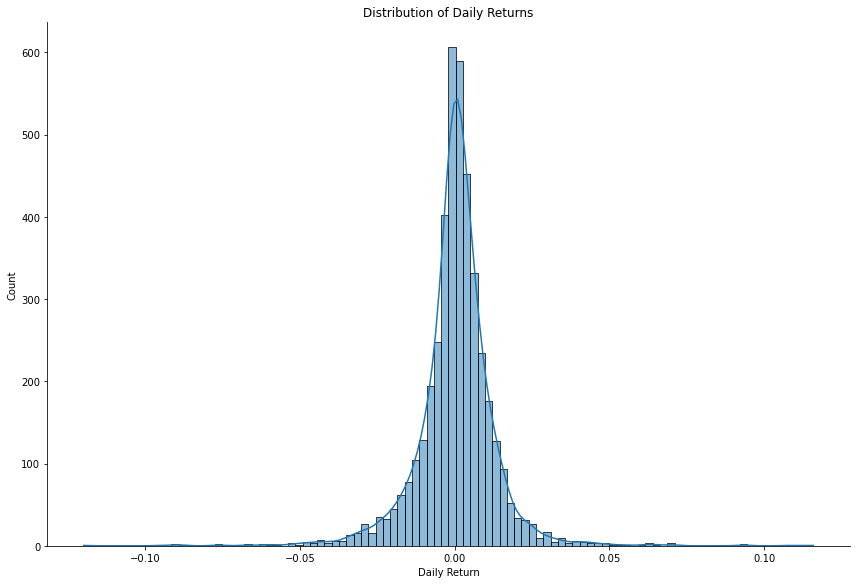

Skewness (Daily Returns):  -0.2537134257722713
Kurtosis (Daily Returns):  12.065326013069045
count    4278.000000
mean        0.000259
std         0.012732
min        -0.127652
25%        -0.004144
50%         0.000697
75%         0.005752
max         0.109572
Name: Log Return, dtype: float64


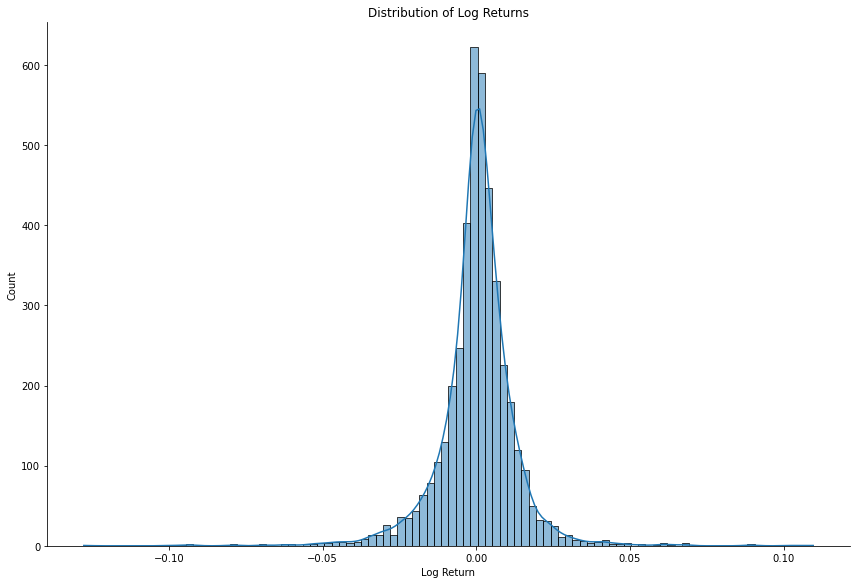

Skewness (Log Returns):  -0.5209735079370402
Kurtosis (Log Returns):  12.309461108836702


In [28]:

# Descriptive statistics for daily returns
print(sp500['Daily Return'].describe())

# Plotting the distribution of daily returns
sns.displot(sp500['Daily Return'].dropna(), bins=100, kde=True, height=8, aspect=1.5)
plt.title('Distribution of Daily Returns')
plt.show()

# Skewness and kurtosis for daily returns
print('Skewness (Daily Returns): ', skew(sp500['Daily Return'].dropna()))
print('Kurtosis (Daily Returns): ', kurtosis(sp500['Daily Return'].dropna()))

# Descriptive statistics for log returns
print(sp500['Log Return'].describe())

# Plotting the distribution of log returns
sns.displot(sp500['Log Return'].dropna(), bins=100, kde=True, height=8, aspect=1.5)
plt.title('Distribution of Log Returns')
plt.show()

# Skewness and kurtosis for log returns
print('Skewness (Log Returns): ', skew(sp500['Log Return'].dropna()))
print('Kurtosis (Log Returns): ', kurtosis(sp500['Log Return'].dropna()))


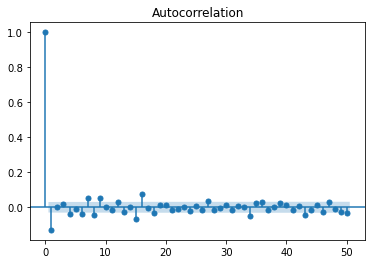

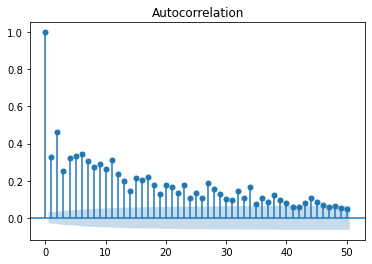

In [29]:
# Plot the autocorrelation of the returns
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sp500['Log Return'].dropna(), lags=50)
plt.show()

# Now, plot the autocorrelation of squared returns

plot_acf(sp500['Squared Return'].dropna(), lags=50)
plt.show()


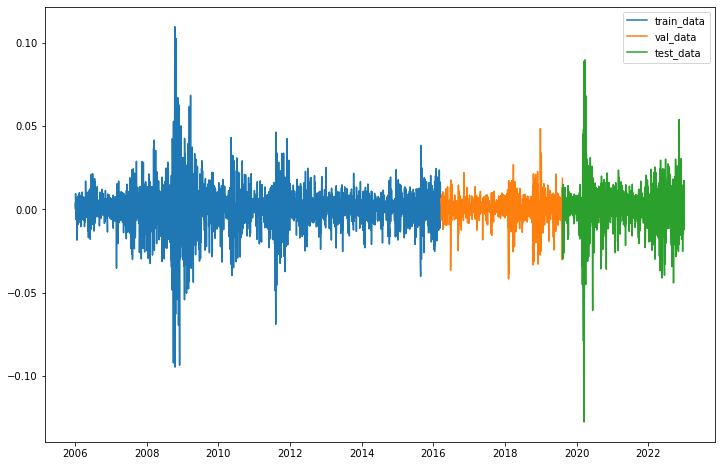

In [34]:

# Split sp500_returns into a train, validation and test set with the weights 0.6, 0.2, 0.2
train_data = sp500_returns[:int(len(sp500_returns)*0.6)]
val_data = sp500_returns[int(len(sp500_returns)*0.6):int(len(sp500_returns)*0.8)]
test_data = sp500_returns[int(len(sp500_returns)*0.8):]

# Plot the train_data, val_data and test_data sets
plt.figure(figsize=(12, 8))
plt.plot(train_data['Log Return'], label='train_data')
plt.plot(val_data['Log Return'], label='val_data')
plt.plot(test_data['Log Return'], label='test_data')
plt.legend()
plt.show()


In [43]:
# Perform an ADF test on the data

adf_result = adfuller(sp500['Log Return'].dropna())

# adf test value and p-value
adf, p_value, *_ = adf_result

# Print out adf and its p-value
print(f'ADF Statistic: {adf}')
print(f'p-value: {p_value}')

ADF Statistic: -15.759502575694396
p-value: 1.1964254838620745e-28


,Log Return,Squared Return
Date,,
2006-01-03 00:00:00-05:00,NaN,NaN
2006-01-04 00:00:00-05:00,0.003666,1.343929e-05
2006-01-05 00:00:00-05:00,0.000016,2.471328e-10
2006-01-06 00:00:00-05:00,0.009356,8.752572e-05
2006-01-09 00:00:00-05:00,0.003650,1.332028e-05
...,...,...
2016-03-09 00:00:00-05:00,0.005040,2.539830e-05
2016-03-10 00:00:00-05:00,0.000156,2.427140e-08
2016-03-11 00:00:00-05:00,0.016263,2.644704e-04
